#### **Missing Value:**

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df=pd.read_csv("AmesHousing.csv")

In [38]:
# To count the na values using value_counts we can use dropna=False
df["Alley"].value_counts(dropna=False)

Alley
NaN     2732
Grvl     120
Pave      78
Name: count, dtype: int64

In [39]:
Anteil_Fehlende_Werte=((df["Alley"].isna().sum())/df["Alley"].value_counts(dropna=False).sum())*100
print({f"Anteil der Missing Values: {Anteil_Fehlende_Werte:.2f}%"})

{'Anteil der Missing Values: 93.24%'}


#### **Fehlende Werte mit Heatmap Visulaisieren:**

In [42]:
df=pd.read_csv("scat.csv")
print(df.columns)
df.drop(columns=["Unnamed: 0"],inplace=True)
missing_values=df.isna()
missing_values

Index(['Unnamed: 0', 'Species', 'Month', 'Year', 'Site', 'Location', 'Age',
       'Number', 'Length', 'Diameter', 'Taper', 'TI', 'Mass', 'd13C', 'd15N',
       'CN', 'ropey', 'segmented', 'flat', 'scrape'],
      dtype='object')


,Species,Month,Year,Site,Location,Age,Number,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,ropey,segmented,flat,scrape
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
108,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


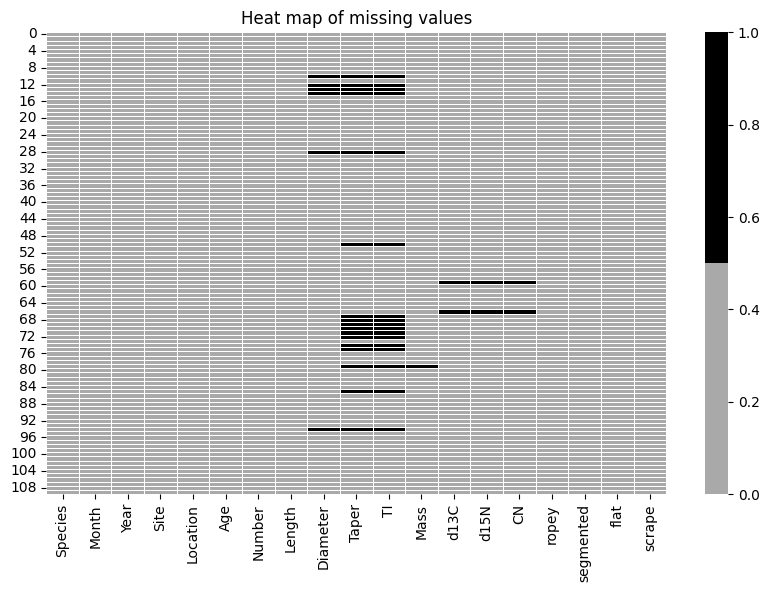

In [43]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(10,6))
cmap = ListedColormap(['darkgrey', 'black'])
sns.heatmap(missing_values, cmap=cmap, cbar=True,linewidths=0.5)
plt.title("Heat map of missing values")
plt.show()


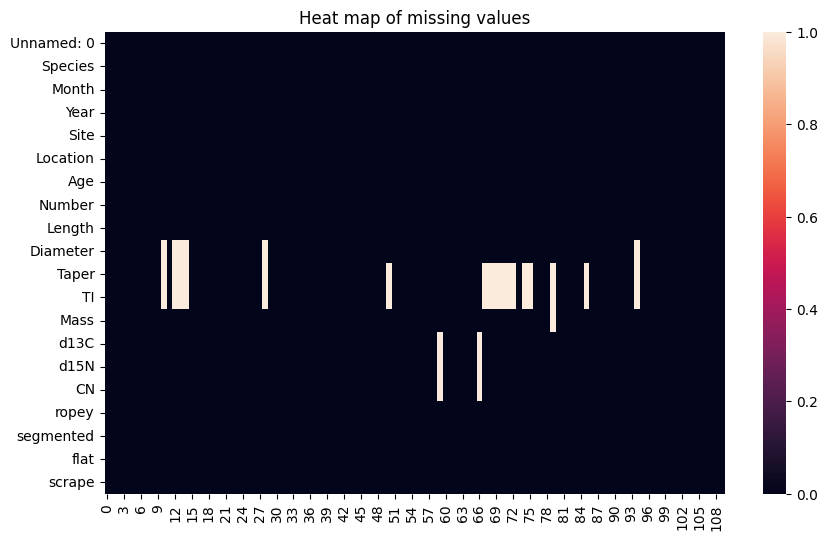

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(missing_values.T)
plt.title("Heat map of missing values")
plt.show()

#### **How to choose the columns that have missing values:**

In [51]:
number_of_raw=df.shape[0]
number_of_raw

110

In [48]:
missing_values_columns=[col for col in missing_values.columns if missing_values[col].any()]
missing_values_columns

['Diameter', 'Taper', 'TI', 'Mass', 'd13C', 'd15N', 'CN']

In [54]:
percentage_missing_values=missing_values.sum(axis=0)/number_of_raw
percentage_missing_values

Species      0.000000
Month        0.000000
Year         0.000000
Site         0.000000
Location     0.000000
Age          0.000000
Number       0.000000
Length       0.000000
Diameter     0.054545
Taper        0.154545
TI           0.154545
Mass         0.009091
d13C         0.018182
d15N         0.018182
CN           0.018182
ropey        0.000000
segmented    0.000000
flat         0.000000
scrape       0.000000
dtype: float64

##### **Another Way:**

In [60]:
percentage_missing_values_new=df.isna().mean()*100
percentage_missing_values_new

Species       0.000000
Month         0.000000
Year          0.000000
Site          0.000000
Location      0.000000
Age           0.000000
Number        0.000000
Length        0.000000
Diameter      5.454545
Taper        15.454545
TI           15.454545
Mass          0.909091
d13C          1.818182
d15N          1.818182
CN            1.818182
ropey         0.000000
segmented     0.000000
flat          0.000000
scrape        0.000000
dtype: float64

In [62]:
percentage_missing_values_per_sample = df.isna().mean(axis=1) * 100
percentage_missing_values_per_sample.sort_values(ascending=False)

59     15.789474
28     15.789474
79     15.789474
94     15.789474
66     15.789474
         ...    
36      0.000000
35      0.000000
34      0.000000
33      0.000000
109     0.000000
Length: 110, dtype: float64

##### **Chicago train Dataframe:**

In [65]:
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [63]:
chicage_df=pd.read_parquet("chicago_train_data.parquet")

In [84]:
number_of_rows=chicage_df.shape[0]

In [96]:
chicage_df.describe()

,Austin (Blue Line),Harlem/Lake (Green Line),Pulaski (Green Line),"Quincy/Wells (Brown, Orange, Purple & Pink Lines)",Davis (Purple Line),Belmont (Blue Line),Jackson (Blue Line),Sheridan (Red Line),Damen (Brown Line),Morse (Red Line),...,Irving Park (Brown Line),Western (Brown Line),Harrison (Red Line),Montrose (Brown Line),Morgan (Green & Pink Lines),Homan (Green Line),Lake (Red Line),Conservatory (Green Line),Oakton-Skokie (Yellow Line),Cermak-McCormick Place (Green Line)
count,5733.000000,5733.000000,5733.000000,5733.000000,5733.000000,5733.000000,5733.000000,5733.000000,5733.00000,5733.000000,...,5733.000000,5733.000000,5733.000000,5733.000000,1595.000000,31.000000,5733.000000,5582.000000,1625.000000,620.000000
mean,1.524636,3.081312,1.448726,5.585568,3.327815,4.092798,6.030783,4.383695,1.73978,3.803979,...,2.063080,3.189658,3.085673,1.900520,1.886888,0.000871,13.201851,0.702064,0.672699,1.123990
std,0.566842,0.980571,0.456014,2.915254,0.814956,1.259883,2.611577,1.155068,0.79716,0.943125,...,0.981686,0.964760,1.243655,0.854077,0.731845,0.004849,5.503650,0.250263,0.356303,0.469353
min,0.187000,0.066000,0.396000,0.000000,0.000000,0.713000,0.000000,0.617000,0.00000,0.000000,...,0.000000,0.387000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.956000,2.335000,1.107000,1.853000,2.896000,2.907000,3.329000,3.616000,1.12500,3.208000,...,1.242000,2.610000,2.138000,1.233000,1.294500,0.000000,8.778000,0.529000,0.379000,0.857500
50%,1.664000,3.383000,1.470000,7.024000,3.635000,4.470000,7.031000,4.631000,1.91500,3.989000,...,2.276000,3.346000,3.034000,2.074000,1.978000,0.000000,13.611000,0.708000,0.822000,1.186000
75%,1.988000,3.813000,1.812000,7.789000,3.870000,4.940000,7.893000,5.206000,2.32800,4.437000,...,2.879000,3.938000,3.992000,2.584000,2.435500,0.000000,17.280000,0.907000,0.961000,1.385750
max,2.733000,5.976000,2.588000,9.819000,4.881000,6.416000,18.405000,10.587000,3.41300,5.804000,...,6.137000,7.252000,7.892000,4.042000,4.279000,0.027000,28.460000,1.838000,1.256000,3.553000


In [86]:
# make the mask for my missing values:
missing=chicage_df.isna()

In [87]:
# Percentage on missing values in each column
(chicage_df.isna().mean()*100).sort_values(ascending=False).head(15)

Homan (Green Line)                     99.459271
Cermak-McCormick Place (Green Line)    89.185418
Morgan (Green & Pink Lines)            72.178615
Oakton-Skokie (Yellow Line)            71.655329
Washington (Red Line)                  48.491191
Conservatory (Green Line)               2.633874
Cermak-Chinatown (Red Line)             0.523286
79th (Red Line)                         0.523286
95th/Dan Ryan (Red Line)                0.523286
Sox-35th (Red Line)                     0.523286
63rd (Red Line)                         0.523286
47th (Red Line)                         0.523286
87th (Red Line)                         0.523286
Garfield (Red Line)                     0.523286
69th (Red Line)                         0.523286
dtype: float64

<Axes: xlabel='date'>

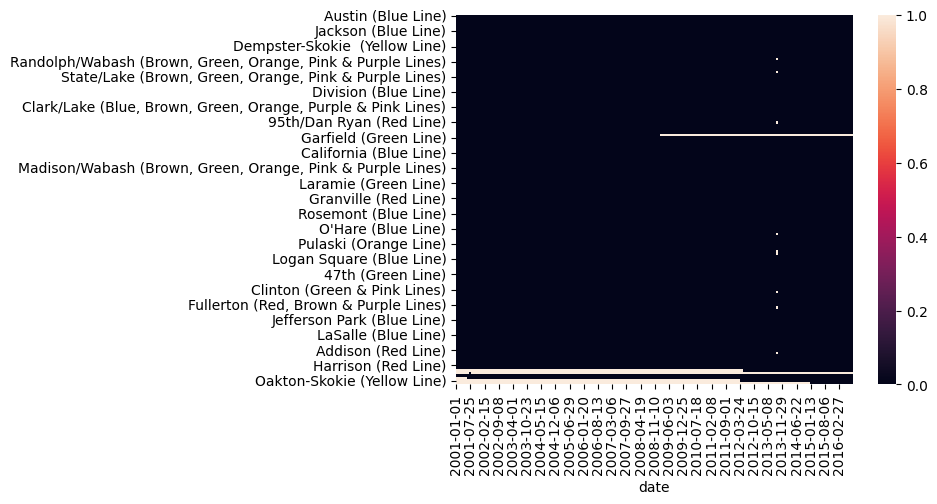

In [88]:
# Plotting my missing values:
sns.heatmap(
    missing.T,
    
)

#### **Deleting Missing Values:**

In [89]:
# lets see the number of missing values in each columns
chicage_df.isna().sum(axis=0).sort_values(ascending=False).head(20)

Homan (Green Line)                     5702
Cermak-McCormick Place (Green Line)    5113
Morgan (Green & Pink Lines)            4138
Oakton-Skokie (Yellow Line)            4108
Washington (Red Line)                  2780
Conservatory (Green Line)               151
Cermak-Chinatown (Red Line)              30
79th (Red Line)                          30
95th/Dan Ryan (Red Line)                 30
Sox-35th (Red Line)                      30
63rd (Red Line)                          30
47th (Red Line)                          30
87th (Red Line)                          30
Garfield (Red Line)                      30
69th (Red Line)                          30
Kedzie (Green Line)                       0
47th (Green Line)                         0
Ashland (Orange Line)                     0
Monroe (Red Line)                         0
35th-Bronzeville-IIT (Green Line)         0
dtype: int64

<Axes: xlabel='date'>

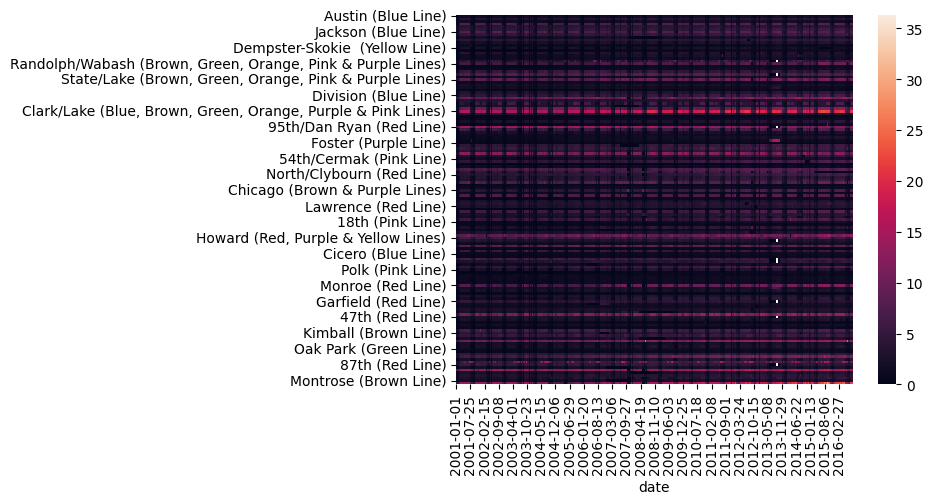

In [94]:
# Lets make a threshold such that every column that contains more than 30
# missing values will be excluded
# Every Columns that has fewer number of non-na values will be dropped
sns.heatmap(
    chicage_df.dropna(axis="columns",thresh=number_of_rows-30).T
)

#### **Impute Most Common:**

In [98]:
chicage_df_cols_deleted=chicage_df.dropna(axis="columns",thresh=number_of_rows-30)

In [102]:
chicage_df_cols_deleted.isna().sum().sort_values(ascending=False).head(15)

79th (Red Line)                            30
69th (Red Line)                            30
Sox-35th (Red Line)                        30
Garfield (Red Line)                        30
95th/Dan Ryan (Red Line)                   30
Cermak-Chinatown (Red Line)                30
87th (Red Line)                            30
63rd (Red Line)                            30
47th (Red Line)                            30
Polk (Pink Line)                            0
Rockwell (Brown Line)                       0
Logan Square (Blue Line)                    0
Austin (Blue Line)                          0
Harlem (Blue Line - Forest Park Branch)     0
Linden (Purple Line)                        0
dtype: int64

In [103]:
from sklearn.impute import SimpleImputer

In [106]:
# A good value to be replaced instead of the missing values
# The mean of all means of all columns
chicage_df_cols_deleted.mean().mean()

3.301028425856202

In [107]:
s_imp=SimpleImputer(missing_values=pd.NA,
                    strategy="constant",
                    fill_value=chicage_df_cols_deleted.mean().mean())

In [108]:
imputed_df=pd.DataFrame(s_imp.fit_transform(chicage_df_cols_deleted),
                        columns=chicage_df_cols_deleted.columns,
                        index=chicage_df_cols_deleted.index
                        )
                        

In [109]:
imputed_df

,Austin (Blue Line),Harlem/Lake (Green Line),Pulaski (Green Line),"Quincy/Wells (Brown, Orange, Purple & Pink Lines)",Davis (Purple Line),Belmont (Blue Line),Jackson (Blue Line),Sheridan (Red Line),Damen (Brown Line),Morse (Red Line),...,Chicago (Blue Line),Addison (Red Line),87th (Red Line),Addison (Brown Line),Chicago (Red Line),Irving Park (Brown Line),Western (Brown Line),Harrison (Red Line),Montrose (Brown Line),Lake (Red Line)
date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,0.290,0.633,0.483,0.374,0.804,1.165,0.649,1.116,0.411,1.698,...,0.252,1.227,1.659,0.225,4.395,0.327,0.715,0.502,0.338,2.942
2001-01-02,1.240,2.950,1.230,7.737,3.199,4.046,5.777,3.854,1.823,3.807,...,1.706,3.937,4.577,1.512,11.058,2.040,3.194,2.390,1.710,12.087
2001-01-03,1.412,3.107,1.394,8.051,3.476,4.153,6.482,4.147,1.905,4.047,...,1.918,4.329,4.782,1.699,11.680,2.124,3.272,2.495,1.888,12.622
2001-01-04,1.388,3.259,1.370,8.027,3.540,4.362,6.766,4.202,2.008,4.107,...,1.962,4.607,5.111,1.717,11.883,2.246,3.398,2.531,1.905,12.936
2001-01-05,1.465,3.357,1.453,7.653,3.684,4.400,6.308,4.404,2.088,4.381,...,1.997,4.666,5.266,1.736,12.771,2.362,3.346,2.202,2.049,13.043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-07,2.307,3.848,1.487,8.473,3.555,5.879,8.275,5.859,3.230,5.009,...,4.344,6.826,4.375,2.831,15.755,3.350,4.237,4.977,2.939,21.987
2016-09-08,2.318,4.036,1.491,8.430,3.874,6.024,8.581,6.109,3.307,5.161,...,4.333,7.124,4.437,2.884,16.048,3.358,4.348,5.050,3.011,22.631
2016-09-09,2.267,4.056,1.581,7.866,3.712,5.925,7.427,5.978,3.191,5.123,...,4.270,7.771,4.796,2.947,16.342,3.314,4.561,4.900,2.954,21.927


<Axes: xlabel='date'>

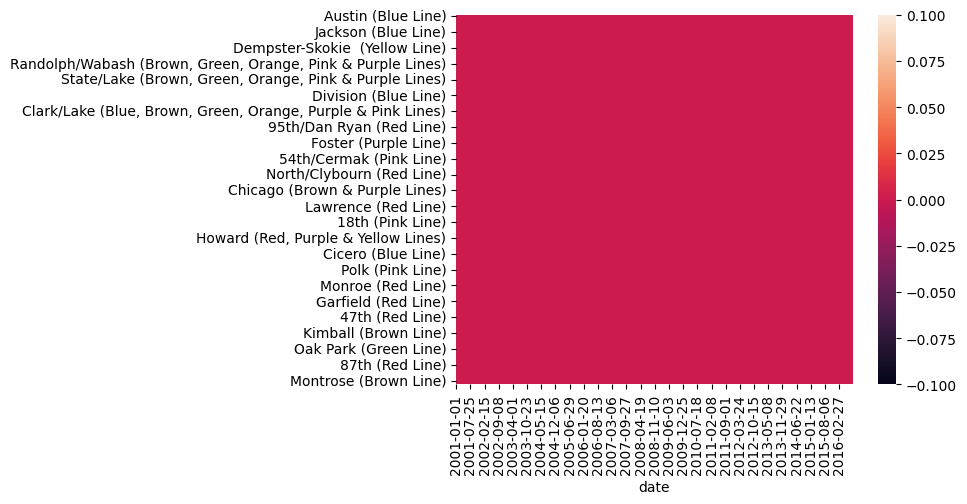

In [113]:
# Lets visualize the imputed dataframe
sns.heatmap(
    imputed_df.isna().T
)
# Notice that we dont have missing values anymore after imputing

In [117]:
chicage_df_cols_deleted.isna().sum().sort_values(ascending=False)

79th (Red Line)                            30
69th (Red Line)                            30
Sox-35th (Red Line)                        30
Garfield (Red Line)                        30
95th/Dan Ryan (Red Line)                   30
                                           ..
Merchandise Mart (Brown & Purple Lines)     0
California (Pink Line)                      0
Clinton (Blue Line)                         0
Cicero (Pink Line)                          0
Lake (Red Line)                             0
Length: 140, dtype: int64

In [130]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# iterative_imputer = IterativeImputer(max_iter=2)

In [119]:
new_imp=SimpleImputer(
    strategy="mean"
)

In [120]:
mean_imputed_df=pd.DataFrame(new_imp.fit_transform(chicage_df_cols_deleted),
                             columns=chicage_df_cols_deleted.columns,
                             index=chicage_df_cols_deleted.index)

In [123]:
mean_imputed_df.isna().sum().sort_values(ascending=False)

Austin (Blue Line)                         0
Polk (Pink Line)                           0
Cicero (Blue Line)                         0
Harlem (Blue Line - Forest Park Branch)    0
69th (Red Line)                            0
                                          ..
Clinton (Blue Line)                        0
Cicero (Pink Line)                         0
Noyes (Purple Line)                        0
Forest Park (Blue Line)                    0
Lake (Red Line)                            0
Length: 140, dtype: int64